### Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression

import kde_funcs as kde

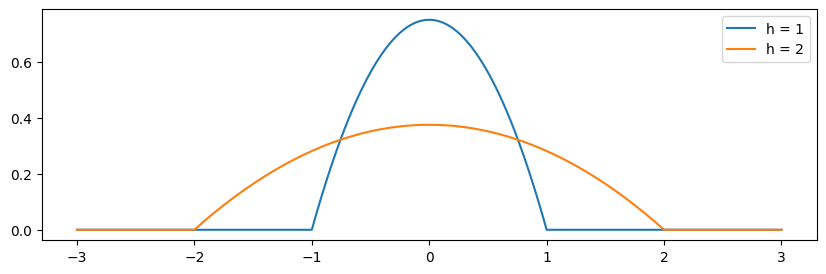

In [2]:
h = 2
x_arr = np.linspace(-3, 3, 1000)

plt.figure(figsize=(10, 3))
plt.plot(x_arr, kde.kernel_epa(x_arr), label='h = 1')
plt.plot(x_arr, (1/h) * kde.kernel_epa(x_arr / h), label=f'h = {h}')

plt.legend()
plt.show()

### naive NW estimator

In [3]:
def nadaraya_watson(x_obs, y_obs, x_pred, kernel, h=1):

    """
    VL - Nichtparametrische Stat 

    Def 4.2 Nadaraya-Watson-Schätzer

    f_{n, h}^{NW} (x) = \frac {\sum Y_i K(x-x_i)}{\sum K(x-x_i)}} 

    """

    y_pred = np.zeros(x_pred.shape[0])

    if kernel == 'epa':
        kernel_func = kde.kernel_epa
    if kernel == 'gauss':
        kernel_func = kde.kernel_gauss
    if kernel == 'rect':
        kernel_func = kde.kernel_rect
    if kernel == 'tri':
        kernel_func = kde.kernel_tri
    if kernel == 'sinc':
        kernel_func = kde.kernel_sinc

    # for each evaluation point

        # w = evaluate kernel function of each observation at evaluation point
        # w * y = multiply with respective y_obs
        # y_pred = w * y / sum(w)

    for i, x in enumerate(x_pred):
        
        w = kernel_func((x - x_obs) / h)
        w = w / np.sum(w)
        
        y_pred[i] = np.sum(w * y_obs) 
        
        if np.abs(y_pred[i]) > 100:
            print('- '*10)
            print(f"y_pred = {y_pred[i]}")
            print(f"sum w = {np.sum(w)}")
            print(f"w = {np.round(w)}")
            print(f"y = {np.round(y_obs)}")

    return y_pred

#### problem with sinc kernel

C:\Users\ytl_c\AppData\Local\Temp\ipykernel_10364\3570677185.py:34: RuntimeWarning: divide by zero encountered in divide
  w = w / np.sum(w)
C:\Users\ytl_c\AppData\Local\Temp\ipykernel_10364\3570677185.py:34: RuntimeWarning: invalid value encountered in divide
  w = w / np.sum(w)


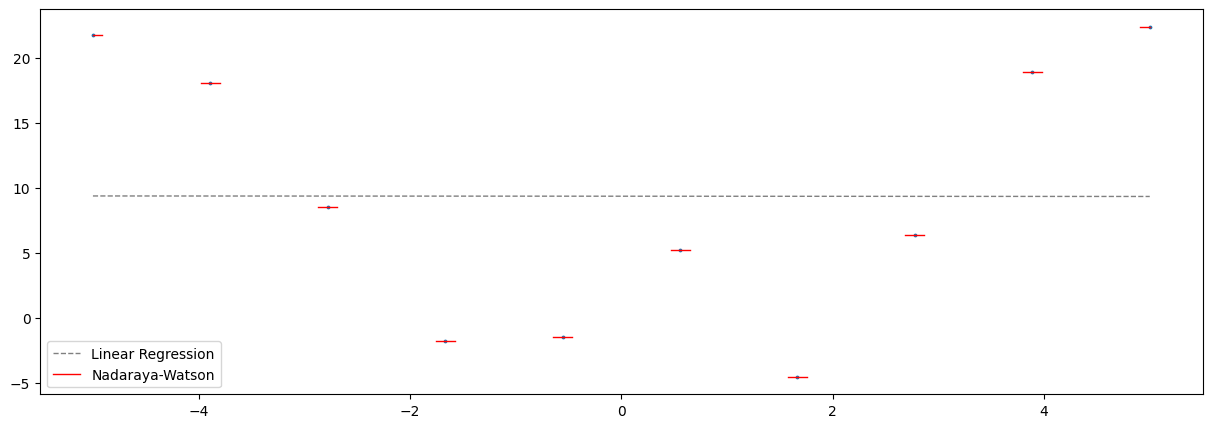

In [45]:
# simulation params
n = 10
x_min = -5
x_max = 5

np.random.seed(123)
# generate data using trend = x^2 and gaussian noise
x = np.linspace(x_min, x_max, n)
# print(f"observations at x = {x}")
y = x**2 + np.random.normal(0, 3, n)

# Fit Linear Regression model
model = LinearRegression()
model.fit(x.reshape(-1, 1), y)
y_pred = model.predict(x.reshape(-1, 1))

# Use Nadaraya-Watson Estimator
x_pred = np.linspace(x_min, x_max, n*100)
# print(f"making NW pred at {x_pred}")

h = 0.1 * (1/np.pi)
h = 0.1
y_pred_nw = nadaraya_watson(x, y, x_pred, 'epa', h=h)

# Plot the original data and the regression line
plt.figure(figsize=(15, 5))
plt.scatter(x, y, s=3)
plt.plot(x, y_pred, color='grey', ls='--', lw=1, label='Linear Regression')
plt.plot(x_pred, y_pred_nw, color='red', lw=1, label='Nadaraya-Watson')

plt.legend()
plt.show()

In [5]:
# PROBLEM with kernels that have negative values in naive NW estimator

# in the worst case scenario at some evaluation point x
# the kernel outputs cancel each other out in sum(K) and the sum gets really small ( in some cases even negative )
# therefore the effective weight w_i = K / sum(K) gets blown up

# even though the sum of the weights is still 1, the individual weights can get jumpy, eg :
# w = [ 35. -44.   2.  12.   1.  -6.  -2.   4.   2.  -3. ]
# y = [ 24. 10. 11. 10.  9. -0.  5.  5. 17. 26. ]

# therefore y_pred = sum( w_i * y_i ) gets blown up as well in both positive and negative directions

#### naive NW for diff kernels and h

C:\Users\ytl_c\AppData\Local\Temp\ipykernel_10364\3570677185.py:34: RuntimeWarning: invalid value encountered in divide
  w = w / np.sum(w)


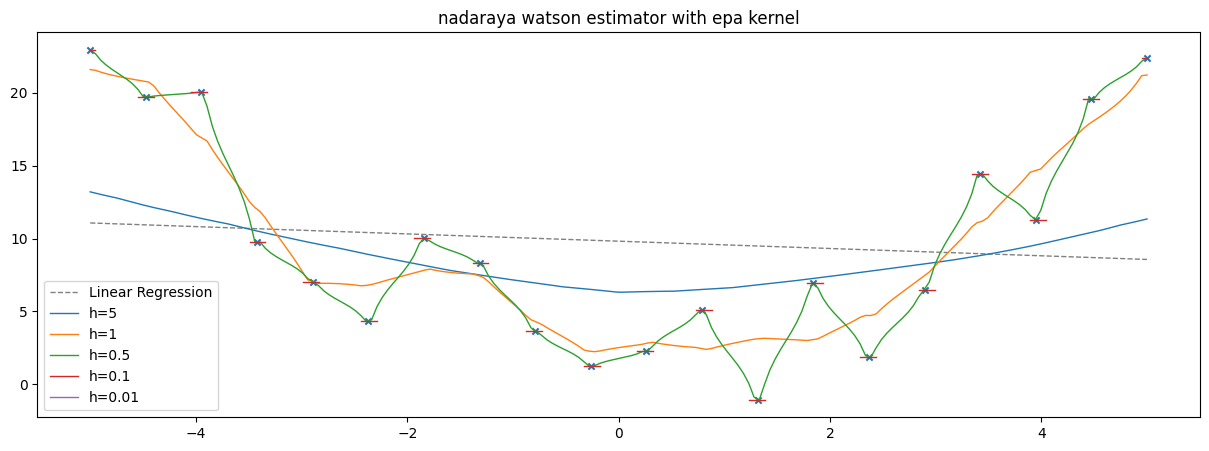

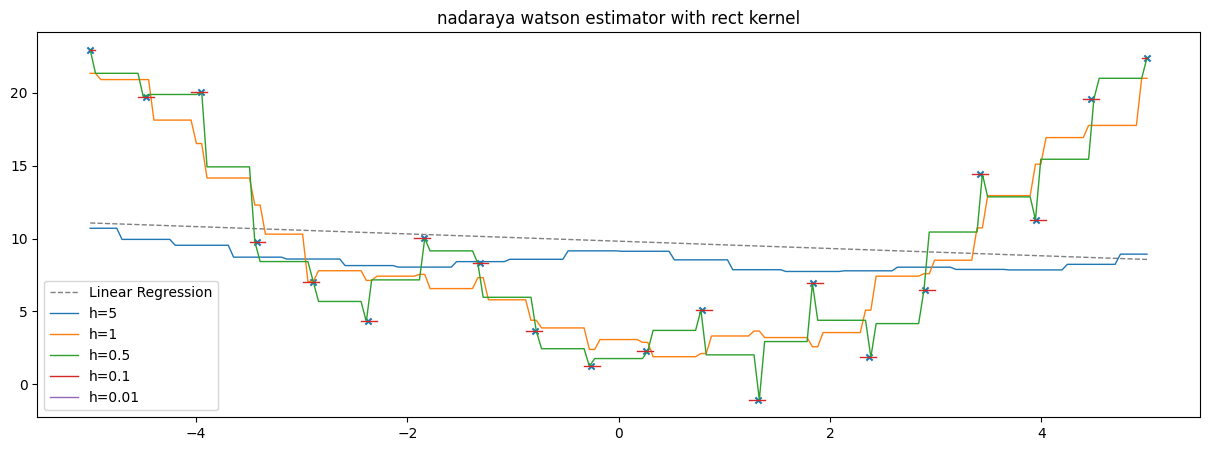

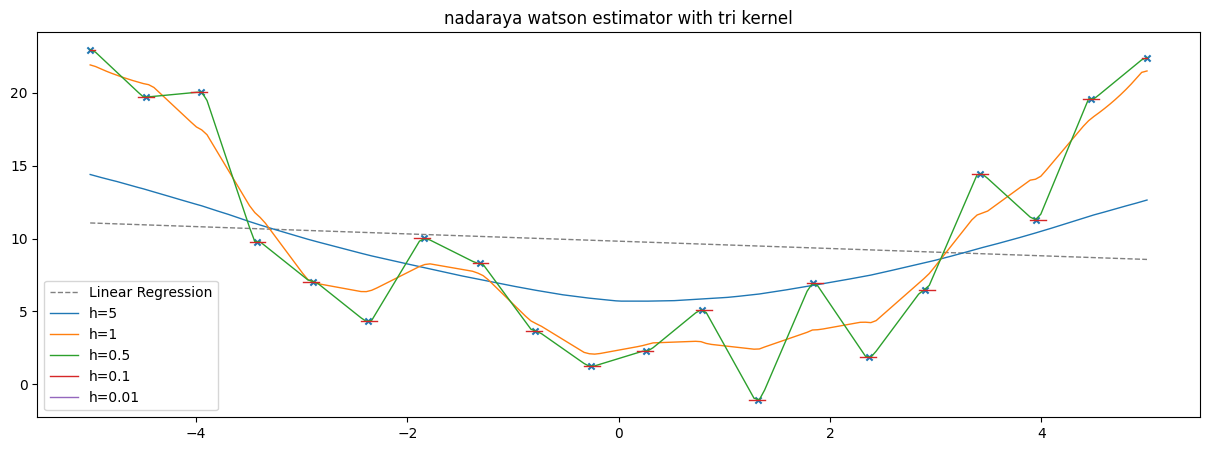

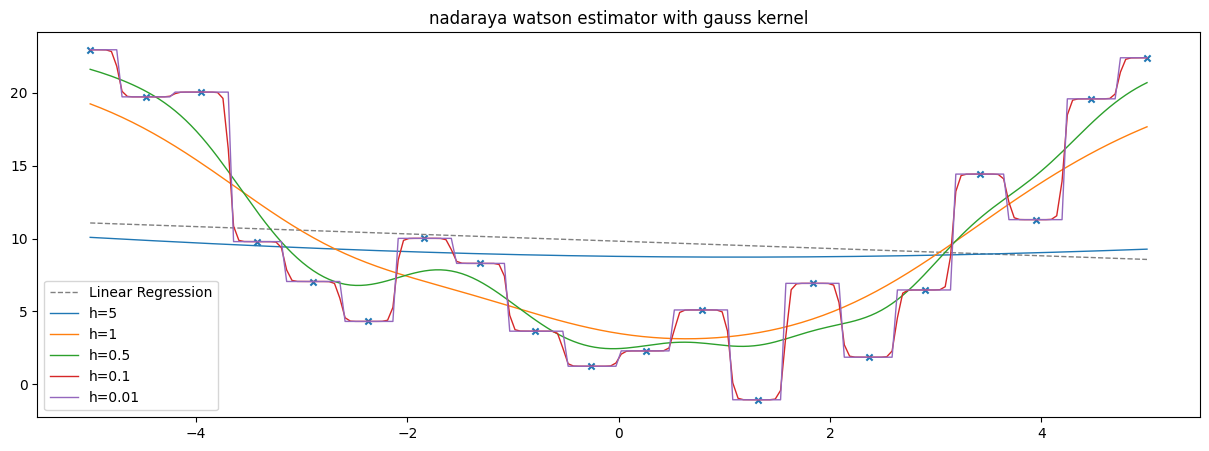

c:\Users\ytl_c\OneDrive\Desktop\23_24 WS (Master)\Kernel Simulations\kde_funcs.py:32: RuntimeWarning: invalid value encountered in divide
  return np.where(x == 0, (1/np.pi), np.sin(x)/(np.pi*x))


- - - - - - - - - - 
y_pred = 161.5558840977125
sum w = 1.0000000000000004
w = [ -6.   7.  -4.  -4.  15. -25.  33. -31.  27. -17.   6.   3.  -7.   6.
  -3.  -1.   4.  -4.   2.   1.]
y = [23. 20. 20. 10.  7.  4. 10.  8.  4.  1.  2.  5. -1.  7.  2.  6. 14. 11.
 20. 22.]
- - - - - - - - - - 
y_pred = 327.9962627285694
sum w = 0.9999999999999902
w = [  1.   2.  -4.   4.  -1.  -3.   6.  -7.   3.   6. -17.  27. -31.  33.
 -25.  15.  -4.  -4.   7.  -6.]
y = [23. 20. 20. 10.  7.  4. 10.  8.  4.  1.  2.  5. -1.  7.  2.  6. 14. 11.
 20. 22.]


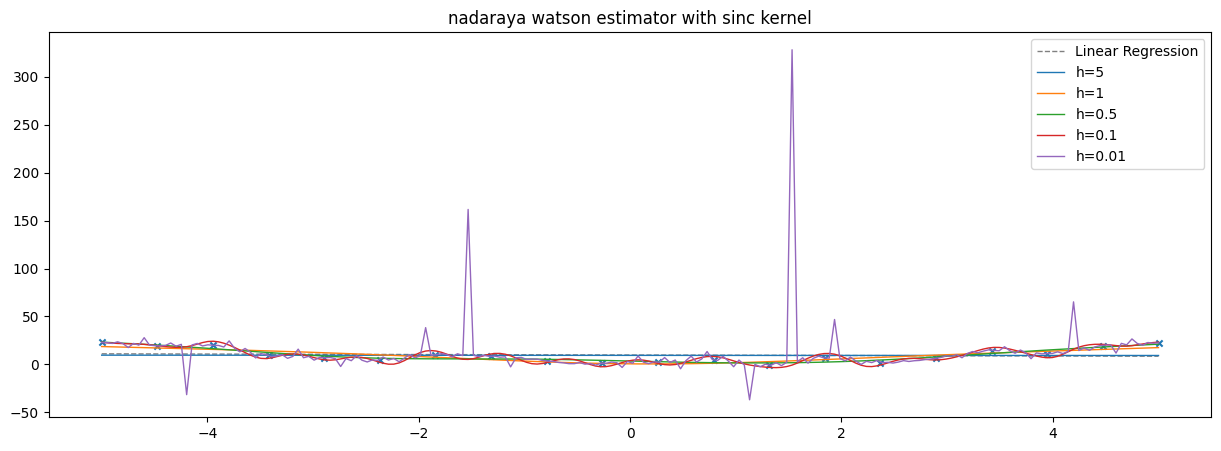

In [11]:
# simulation params
n = 20
x_min = -5
x_max = 5

# generate data using trend = x^2 and gaussian noise
x = np.linspace(x_min, x_max, n)
# print(f"observations at x = {x}")
y = x**2 + np.random.normal(0, 3, n)

# Fit Linear Regression model
model = LinearRegression()
model.fit(x.reshape(-1, 1), y)
y_pred = model.predict(x.reshape(-1, 1))

# Use Nadaraya-Watson Estimator
x_pred = np.linspace(x_min, x_max, n*10)
# print(f"making NW pred at {x_pred}")

kernel_types = ['epa', 'rect', 'tri', 'gauss', 'sinc']
h_arr = [5, 1, 0.5, 0.1, 0.01]

for kernel_type in kernel_types :

    plt.figure(figsize=(15, 5))
    plt.scatter(x, y, s=20, marker='x')
    plt.plot(x, y_pred, color='grey', ls='--', lw=1, label='Linear Regression')

    for h in h_arr :
        y_pred_nw = nadaraya_watson(x, y, x_pred, kernel_type, h=h)
        plt.plot(x_pred, y_pred_nw, lw=1, label=f'h={h}')

    plt.title(f"nadaraya watson estimator with {kernel_type} kernel")
    plt.legend()
    plt.show()

#### compare with statsmodels

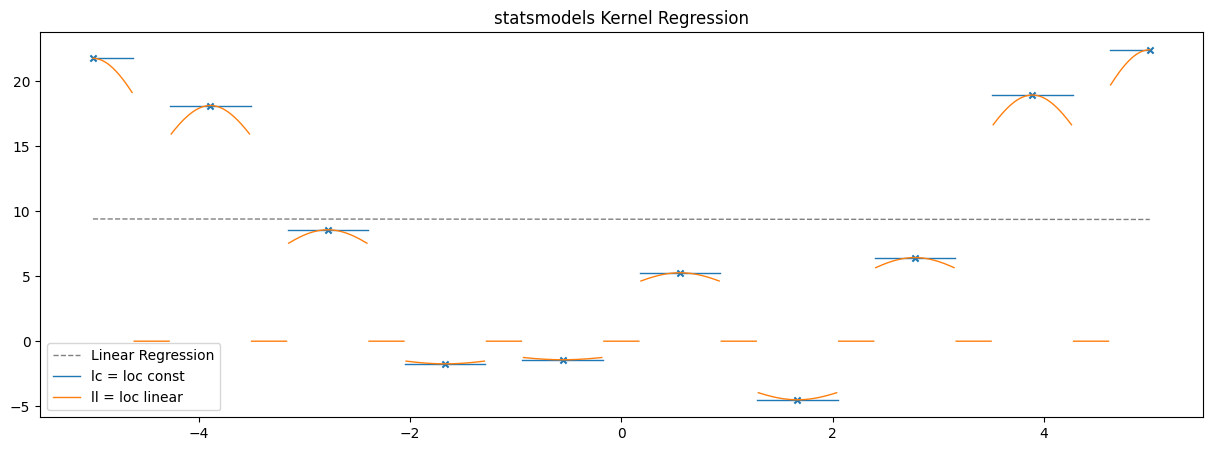

In [44]:
from statsmodels.nonparametric.kernel_regression import KernelReg

y_pred_sm_ll = KernelReg(y, x, var_type='c', reg_type='ll', ckertype='gaussian', bw=[0.01]).fit(x_pred)[0]
y_pred_sm_lc = KernelReg(y, x, var_type='c', reg_type='lc', ckertype='gaussian', bw=[0.01]).fit(x_pred)[0]

# distinguish between local constant and local linear regression
# only has gaussian kernel for continuous variables

plt.figure(figsize=(15, 5))
plt.scatter(x, y, s=20, marker='x')
plt.plot(x, y_pred, color='grey', ls='--', lw=1, label='Linear Regression')

plt.plot(x_pred, y_pred_sm_lc, lw=1, label='lc = loc const')
plt.plot(x_pred, y_pred_sm_ll, lw=1, label='ll = loc linear')

plt.title(f"statsmodels Kernel Regression")
plt.legend()
plt.show()

### argmin NW estimator

In [26]:
def nadaraya_watson_argmin(x_obs, y_obs, x_pred, kernel, h=1):

    """
    VL - Nichtparametrische Stat 

    Def 4.2 Nadaraya-Watson-Schätzer ... Verallgemeinerung

    ALT :
    \hat f_{n, h}^{NW} (x) = \frac {\sum Y_i K(x-x_i)}{\sum K(x-x_i)}} 

    NEU :
    \hat f_{n, h}^{NW} (x) = argmin_{y \in \R} \sum^n (Y_i - y)^2 K(x - x_i)

    """

    y_pred = np.empty(x_pred.shape[0])
    y_pred[:] = np.nan
    
    if kernel == 'epa':
        kernel_func = kde.kernel_epa
    if kernel == 'gauss':
        kernel_func = kde.kernel_gauss
    if kernel == 'rect':
        kernel_func = kde.kernel_rect
    if kernel == 'tri':
        kernel_func = kde.kernel_tri
    if kernel == 'sinc':
        kernel_func = kde.kernel_sinc

    # for each evaluation point

        # find optimal y_opt that minimizes kernel weighted sum of squared errors
        # define loss function L(y) = sum (Y_i - y)^2 K(x - x_i)
        # run optimizer to find y_opt = argmin L(y)
        # y_pred = y_opt

    for i, x in enumerate(x_pred):

        if np.sum(kernel_func((x - x_obs)/h)) == 0 :
            # print(f"sum of kernel weights is 0 at x = {x}")
            continue
        
        def loss(y):
            return np.sum((y_obs - y)**2 * kernel_func((x - x_obs)/h))
        
        y_opt = minimize(loss, 0).x
        y_pred[i] = y_opt[0]
        
        # if np.abs(y_pred[i]) > 100:
        #     print('- '*10)
        #     print(f"y_pred = {y_pred[i]}")
        #     print(f"sum w = {np.sum(w)}")
        #     print(f"w = {np.round(w)}")
        #     print(f"y = {np.round(y_obs)}")
            
    return y_pred

9.989989989990136


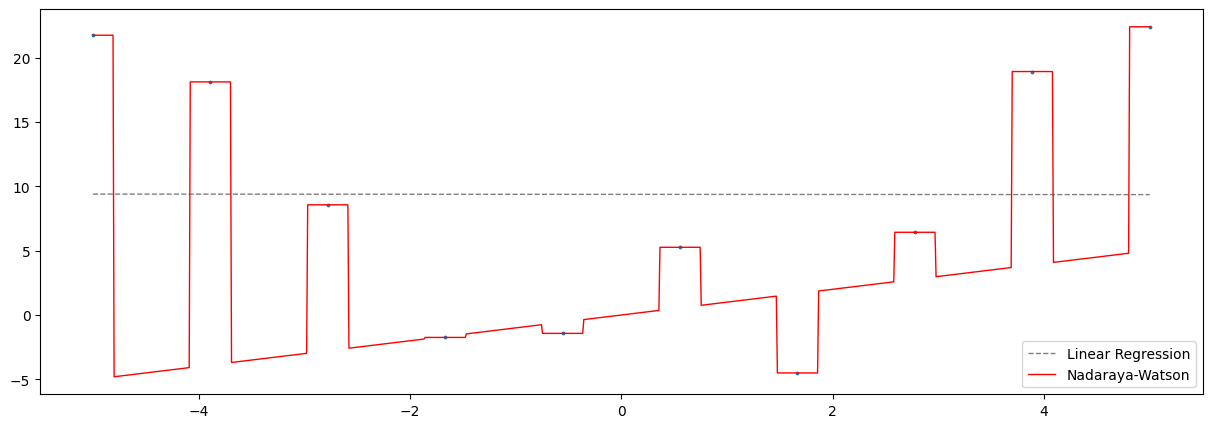

In [28]:
# simulation params
n = 10
x_min = -5
x_max = 5

np.random.seed(123)
# generate data using trend = x^2 and gaussian noise
x = np.linspace(x_min, x_max, n)
# print(f"observations at x = {x}")
y = x**2 + np.random.normal(0, 3, n)

# Fit Linear Regression model
model = LinearRegression()
model.fit(x.reshape(-1, 1), y)
y_pred = model.predict(x.reshape(-1, 1))

# Use Nadaraya-Watson Estimator
x_pred = np.linspace(x_min, x_max, n*100)
# print(f"making NW pred at {x_pred}")

h = 0.1 * (1/np.pi)
h = 0.2
y_pred_nw = nadaraya_watson_argmin(x, y, x_pred, 'rect', h=h)

# Plot the original data and the regression line
plt.figure(figsize=(15, 5))
plt.scatter(x, y, s=3)
plt.plot(x, y_pred, color='grey', ls='--', lw=1, label='Linear Regression')
plt.plot(x_pred, y_pred_nw, color='red', lw=1, label='Nadaraya-Watson')

plt.legend()
plt.show()

[6.95265456e-310 6.95265450e-310 6.95265456e-310 6.95265450e-310
 6.95265450e-310 1.14569714e-311 6.95265456e-310 6.95265456e-310
 6.95265456e-310 6.95265456e-310 1.14569715e-311 1.14539463e-311
 6.95265456e-310 1.14539463e-311 1.14539463e-311 6.95265456e-310
 6.95265456e-310 6.95265456e-310 6.95265456e-310 6.95265456e-310
 1.14569715e-311 1.14539463e-311 6.95265456e-310 1.14539463e-311
 1.14539463e-311 6.95265456e-310 6.95265456e-310 6.95265456e-310
 6.95265456e-310 6.95265456e-310 6.95265456e-310 6.95265450e-310
 6.95265456e-310 6.95265450e-310 6.95265450e-310 1.14569714e-311
 1.14538822e-311 6.95265456e-310 1.14569863e-311 1.14538857e-311
 6.95265456e-310 1.14569863e-311 1.14539463e-311 6.95265456e-310
 1.14539463e-311 1.14539463e-311 1.14539463e-311 1.14569863e-311
 1.14539463e-311 6.95265456e-310 1.14539463e-311 1.14539463e-311
 6.95265456e-310 6.95265450e-310 6.95265456e-310 6.95265450e-310
 6.95265450e-310 6.95265456e-310 1.14538822e-311 1.14538822e-311
 1.14538822e-311 1.145388

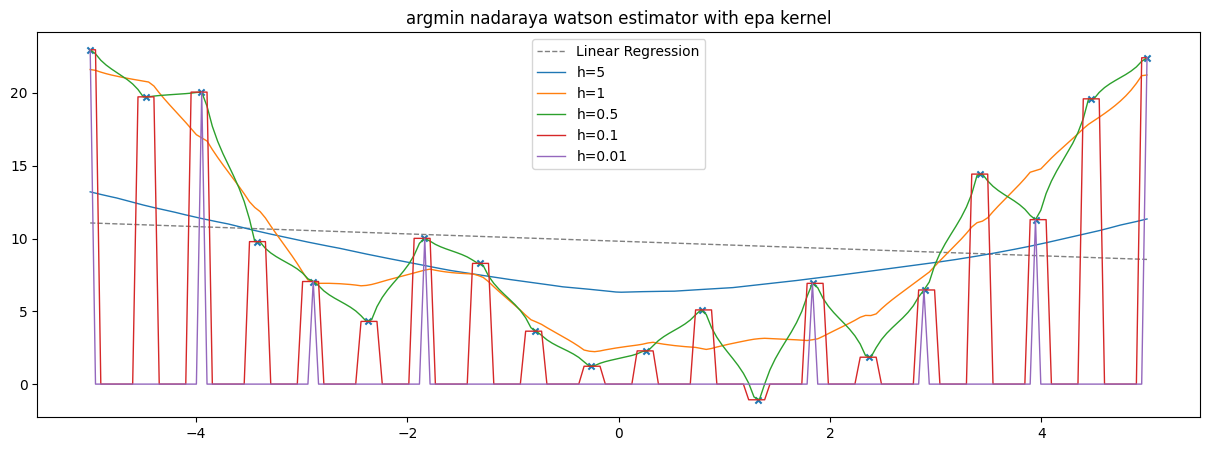

[6.95265456e-310 6.95265450e-310 6.95265456e-310 6.95265450e-310
 6.95265450e-310 1.14567005e-311 6.95265456e-310 6.95265456e-310
 6.95265456e-310 6.95265456e-310 1.14567005e-311 1.14539463e-311
 6.95265456e-310 1.14539463e-311 1.14539463e-311 6.95265456e-310
 6.95265456e-310 6.95265456e-310 6.95265456e-310 6.95265456e-310
 1.14567005e-311 1.14539463e-311 6.95265456e-310 1.14539463e-311
 1.14539463e-311 6.95265456e-310 6.95265456e-310 6.95265456e-310
 6.95265456e-310 6.95265456e-310 6.95265456e-310 6.95265450e-310
 6.95265456e-310 6.95265450e-310 6.95265450e-310 1.14567005e-311
 1.14538822e-311 6.95265456e-310 1.14567005e-311 1.14538857e-311
 6.95265456e-310 1.14567005e-311 1.14539463e-311 6.95265456e-310
 1.14539463e-311 1.14539463e-311 1.14539463e-311 1.14567005e-311
 1.14539463e-311 6.95265456e-310 1.14539463e-311 1.14539463e-311
 6.95265456e-310 6.95265450e-310 6.95265456e-310 6.95265450e-310
 6.95265450e-310 6.95265456e-310 1.14538822e-311 1.14538822e-311
 1.14538822e-311 1.145388

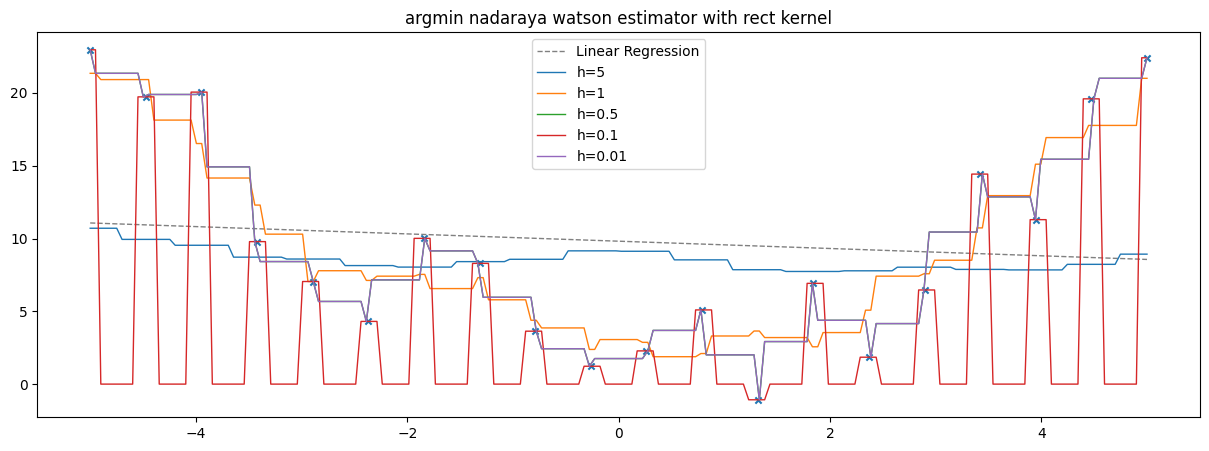

[-5.         -4.94974874 -4.89949749 -4.84924623 -4.79899497 -4.74874372
 -4.69849246 -4.64824121 -4.59798995 -4.54773869 -4.49748744 -4.44723618
 -4.39698492 -4.34673367 -4.29648241 -4.24623116 -4.1959799  -4.14572864
 -4.09547739 -4.04522613 -3.99497487 -3.94472362 -3.89447236 -3.84422111
 -3.79396985 -3.74371859 -3.69346734 -3.64321608 -3.59296482 -3.54271357
 -3.49246231 -3.44221106 -3.3919598  -3.34170854 -3.29145729 -3.24120603
 -3.19095477 -3.14070352 -3.09045226 -3.04020101 -2.98994975 -2.93969849
 -2.88944724 -2.83919598 -2.78894472 -2.73869347 -2.68844221 -2.63819095
 -2.5879397  -2.53768844 -2.48743719 -2.43718593 -2.38693467 -2.33668342
 -2.28643216 -2.2361809  -2.18592965 -2.13567839 -2.08542714 -2.03517588
 -1.98492462 -1.93467337 -1.88442211 -1.83417085 -1.7839196  -1.73366834
 -1.68341709 -1.63316583 -1.58291457 -1.53266332 -1.48241206 -1.4321608
 -1.38190955 -1.33165829 -1.28140704 -1.23115578 -1.18090452 -1.13065327
 -1.08040201 -1.03015075 -0.9798995  -0.92964824 -0.

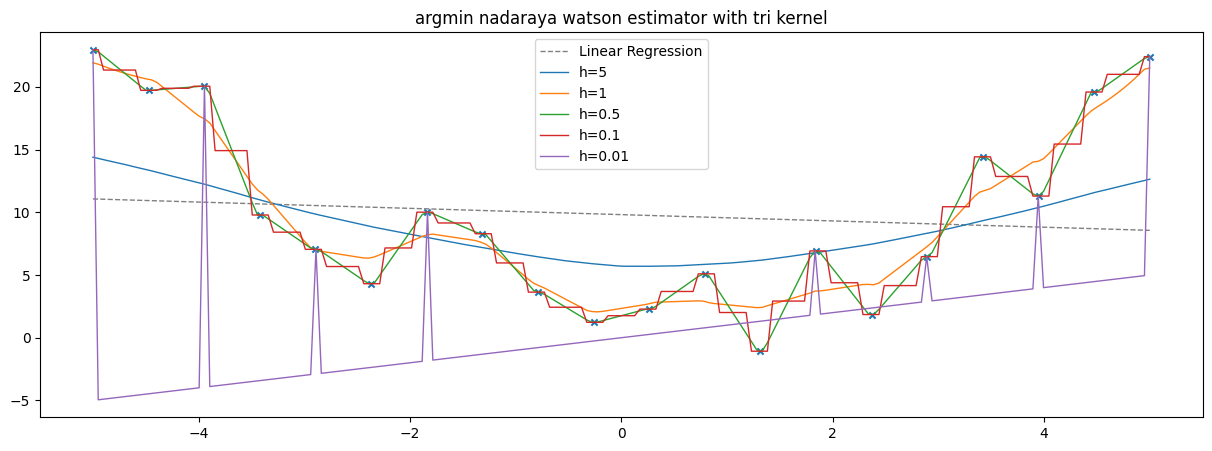

[-5.         -4.94974874 -4.89949749 -4.84924623 -4.79899497 -4.74874372
 -4.69849246 -4.64824121 -4.59798995 -4.54773869 -4.49748744 -4.44723618
 -4.39698492 -4.34673367 -4.29648241 -4.24623116 -4.1959799  -4.14572864
 -4.09547739 -4.04522613 -3.99497487 -3.94472362 -3.89447236 -3.84422111
 -3.79396985 -3.74371859 -3.69346734 -3.64321608 -3.59296482 -3.54271357
 -3.49246231 -3.44221106 -3.3919598  -3.34170854 -3.29145729 -3.24120603
 -3.19095477 -3.14070352 -3.09045226 -3.04020101 -2.98994975 -2.93969849
 -2.88944724 -2.83919598 -2.78894472 -2.73869347 -2.68844221 -2.63819095
 -2.5879397  -2.53768844 -2.48743719 -2.43718593 -2.38693467 -2.33668342
 -2.28643216 -2.2361809  -2.18592965 -2.13567839 -2.08542714 -2.03517588
 -1.98492462 -1.93467337 -1.88442211 -1.83417085 -1.7839196  -1.73366834
 -1.68341709 -1.63316583 -1.58291457 -1.53266332 -1.48241206 -1.4321608
 -1.38190955 -1.33165829 -1.28140704 -1.23115578 -1.18090452 -1.13065327
 -1.08040201 -1.03015075 -0.9798995  -0.92964824 -0.

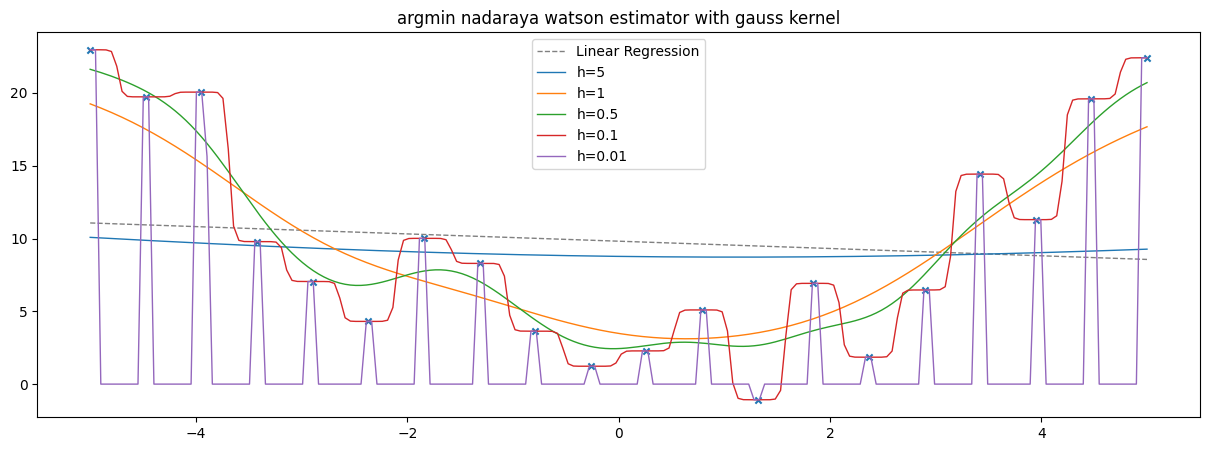

[8.56080957e+179 3.51251989e+117 8.27957193e+045 1.22895674e+165
 4.57637960e+015 5.06699033e-067 8.91342343e+035 1.67335902e+237
 7.92712484e+092 6.00923700e-067 7.39801922e+049 9.49945183e+256
 6.47213609e-056 1.70272642e+219 7.86534644e-067 7.90704407e-061
 3.19120914e-081 1.37608577e+040 7.66891741e+064 3.33711411e-056
 9.44638683e+164 1.25208513e+093 3.23927616e+073 4.26469470e+054
 3.26706606e+088 1.18799833e+195 9.73524837e+011 2.89001656e+020
 1.29246211e+228 8.90000275e+160 1.28607301e+031 5.79874601e+227
 5.07062658e+266 1.81024673e-042 3.19799363e+064 2.68203701e+262
 3.49924770e-033 2.66070239e-047 1.24266013e+223 4.13904473e+079
 9.63400701e+116 3.64700050e+088 7.80797926e+213 6.35700974e+069
 6.63714664e+025 5.70830928e-061 2.39637730e+108 2.84454919e+242
 5.24399430e+068 8.54219760e+194 9.99320052e+010 3.56027230e+127
 6.99616986e+261 2.08299229e+055 7.48603796e-081 5.90250319e+126
 1.97821866e+170 9.74019023e+111 1.25242229e+243 3.50751196e-075
 1.22621111e-080 3.815286

c:\Users\ytl_c\OneDrive\Desktop\23_24 WS (Master)\Kernel Simulations\kde_funcs.py:32: RuntimeWarning: invalid value encountered in divide
  return np.where(x == 0, (1/np.pi), np.sin(x)/(np.pi*x))


[8.56080957e+179 3.51251989e+117 8.27957193e+045 1.22895674e+165
 4.57637960e+015 5.06699033e-067 8.91342343e+035 1.67335902e+237
 7.92712484e+092 6.00923700e-067 7.39801922e+049 9.49945183e+256
 6.47213609e-056 1.70272642e+219 7.86534644e-067 7.90704407e-061
 3.19120914e-081 1.37608577e+040 7.66891741e+064 3.33711411e-056
 9.44638683e+164 1.25208513e+093 3.23927616e+073 4.26469470e+054
 3.26706606e+088 1.18799833e+195 9.73524837e+011 2.89001656e+020
 1.29246211e+228 8.90000275e+160 1.28607301e+031 5.79874601e+227
 5.07062658e+266 1.81024673e-042 3.19799363e+064 2.68203701e+262
 3.49924770e-033 2.66070239e-047 1.24266013e+223 4.13904473e+079
 9.63400701e+116 3.64700050e+088 7.80797926e+213 6.35700974e+069
 6.63714664e+025 5.70830928e-061 2.39637730e+108 2.84454919e+242
 5.24399430e+068 8.54219760e+194 9.99320052e+010 3.56027230e+127
 6.99616986e+261 2.08299229e+055 7.48603796e-081 5.90250319e+126
 1.97821866e+170 9.74019023e+111 1.25242229e+243 3.50751196e-075
 1.22621111e-080 3.815286

c:\Users\ytl_c\OneDrive\Desktop\23_24 WS (Master)\Kernel Simulations\kde_funcs.py:32: RuntimeWarning: invalid value encountered in divide
  return np.where(x == 0, (1/np.pi), np.sin(x)/(np.pi*x))


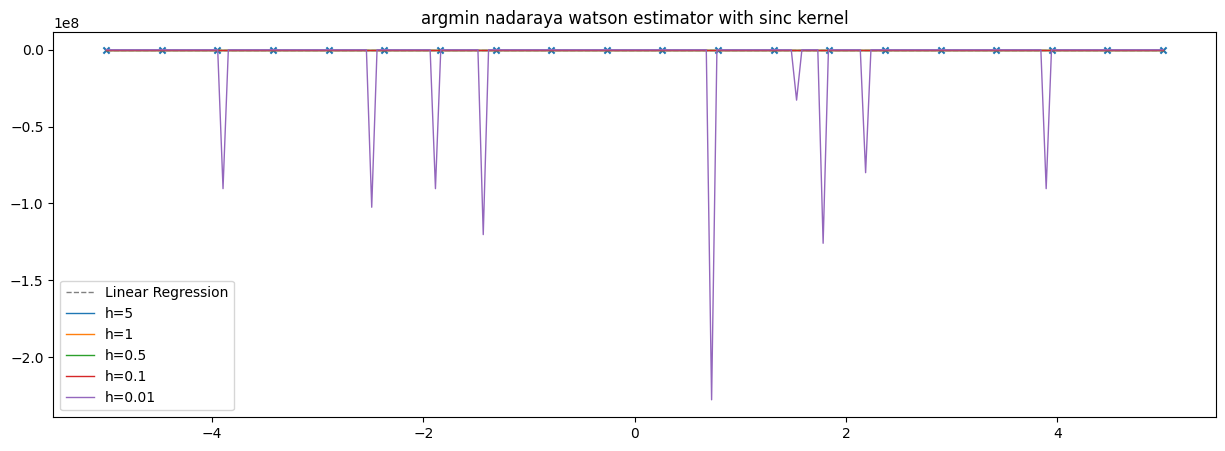

In [22]:
# simulation params
n = 20
x_min = -5
x_max = 5

# generate data using trend = x^2 and gaussian noise
x = np.linspace(x_min, x_max, n)
# print(f"observations at x = {x}")
y = x**2 + np.random.normal(0, 3, n)

# Fit Linear Regression model
model = LinearRegression()
model.fit(x.reshape(-1, 1), y)
y_pred = model.predict(x.reshape(-1, 1))

# Use Nadaraya-Watson Estimator
x_pred = np.linspace(x_min, x_max, n*10)
# print(f"making NW pred at {x_pred}")

kernel_types = ['epa', 'rect', 'tri', 'gauss', 'sinc']
h_arr = [5, 1, 0.5, 0.1, 0.01]

for kernel_type in kernel_types :

    plt.figure(figsize=(15, 5))
    plt.scatter(x, y, s=20, marker='x')
    plt.plot(x, y_pred, color='grey', ls='--', lw=1, label='Linear Regression')

    for h in h_arr :
        y_pred_nw = nadaraya_watson_argmin(x, y, x_pred, kernel_type, h=h)
        plt.plot(x_pred, y_pred_nw, lw=1, label=f'h={h}')

    plt.title(f"argmin nadaraya watson estimator with {kernel_type} kernel")
    plt.legend()
    plt.show()